<a href="https://colab.research.google.com/github/chouhandiksha/bigdataproject/blob/main/notebooks/Analysis%20CH%20Population%20Density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis CH Population Density and Metadata

**Instructions:**

1. Execute the first code cell.
2. There will be a link to follow in order to authorize the google account for drive. Go to that link.
3. A code to authorize the google account will be generated. Copy the code generated.
4. Go back to the cell where the process of mounting the drive is running. Paste the generated code from step 3 to the text box in the cell and press enter.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path

# Chicago Counties
fips = ['17031','17037','17043','17063','17091','17089','17093','17111','17197','17097','18073','18089','18111','18127','55059']
f_string = " ('17031','17037','17043','17063','17091','17089','17093','17111','17197','17097','18073','18089','18111','18127','55059') "

city_dir = 'ch'

source = Path('drive/MyDrive/big-data-project/data/unprocessed/census/safegraph_open_census_data/')
target = Path('drive/MyDrive/big-data-project/data/clean-data/')

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 5.7MB/s 
     |████████████████████████████████| 6.5MB 27.4MB/s 
     |████████████████████████████████| 15.3MB 514kB/s 


In [ ]:
import os
from tqdm.notebook import tqdm, trange

# Import modules
import geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

from IPython.display import display, HTML
import json

import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

**Spark SQL Documentation:** 
https://spark.apache.org/docs/2.2.0/sql-programming-guide.html

In [ ]:
# Install required dependancies
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 212.3MB 68kB/s 
     |████████████████████████████████| 204kB 19.1MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=679a7b82f9215ee651d4dfa60dc1140dc7c3def40b108e456e35b6704eabcef3
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading

In [ ]:
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
!ls drive/MyDrive/big-data-project/data/unprocessed/census/safegraph_open_census_data/data/

cbg_b00.csv  cbg_b08.csv  cbg_b15.csv  cbg_b23.csv  cbg_c17.csv
cbg_b01.csv  cbg_b09.csv  cbg_b19.csv  cbg_b25.csv  cbg_c24.csv
cbg_b02.csv  cbg_b11.csv  cbg_b20.csv  cbg_b27.csv  cbg_patterns.csv
cbg_b03.csv  cbg_b12.csv  cbg_b21.csv  cbg_b99.csv
cbg_b07.csv  cbg_b14.csv  cbg_b22.csv  cbg_c16.csv


In [ ]:
filepath = source/'metadata/cbg_geographic_data.csv'
df_meta = spark.read.format('csv').option('header','true').option('quote',"\"").option('escape',"\"").load(str(filepath))
df_meta.show()

+------------------+-----------+------------+----------+-----------+
|census_block_group|amount_land|amount_water|  latitude|  longitude|
+------------------+-----------+------------+----------+-----------+
|      010010201001|    4254524|       23431|32.4658291|-86.4896143|
|      010010201002|    5568295|           0|32.4858487|-86.4896898|
|      010010202001|    2058380|           0|32.4800823|-86.4749744|
|      010010202002|    1283506|        5968| 32.464435|-86.4697659|
|      010010203001|    3866515|        9054| 32.480175|-86.4607925|
|      010010203002|    1482758|           0|32.4643093|-86.4584716|
|      010010204001|    2730062|        1011|32.4851607|-86.4447716|
|      010010204002|    1782462|       15233|32.4704377|-86.4359688|
|      010010204003|     750824|           0|32.4632218|-86.4442795|
|      010010204004|    1119359|           0|32.4560697|-86.4417625|
|      010010205001|    4317356|           0|32.4460719| -86.418657|
|      010010205002|    5196333|  

In [ ]:
df_meta.createOrReplaceTempView('T')
df_meta = spark.sql('SELECT * FROM T WHERE SUBSTRING(`census_block_group`,1,5) IN ' + f_string)
df_meta.show()

+------------------+-----------+------------+----------+-----------+
|census_block_group|amount_land|amount_water|  latitude|  longitude|
+------------------+-----------+------------+----------+-----------+
|      170310101001|      62463|           0|42.0220538|-87.6683629|
|      170310101002|     183315|           0|42.0213567|-87.6727517|
|      170310101003|     133973|           0|42.0207472|-87.6665209|
|      170310102011|      95922|           0|42.0141744|-87.6819764|
|      170310102012|     259326|           0|42.0174478|-87.6809059|
|      170310102013|     149216|           0|42.0146832| -87.677657|
|      170310102021|     184019|           0|42.0176338|-87.6735826|
|      170310102022|     167737|           0|42.0143138|-87.6730354|
|      170310103001|      86899|           0|  42.01593| -87.665006|
|      170310103002|     148509|           0| 42.018236| -87.667197|
|      170310103003|     104823|           0| 42.013934|-87.6643481|
|      170310103004|     131786|  

In [ ]:
df_meta = df_meta.toPandas()
df_meta = df_meta.rename(columns={'census_block_group':'cbg'})
df_meta

,cbg,amount_land,amount_water,latitude,longitude
0,170310101001,62463,0,42.0220538,-87.6683629
1,170310101002,183315,0,42.0213567,-87.6727517
2,170310101003,133973,0,42.0207472,-87.6665209
3,170310102011,95922,0,42.0141744,-87.6819764
4,170310102012,259326,0,42.0174478,-87.6809059
...,...,...,...,...,...
6669,550590030014,1862837,1693653,42.5414835,-88.2959765
6670,550590030021,3215712,1881343,42.5110991,-88.2592201
6671,550590030022,21795554,0,42.5139611,-88.2179185
6672,550590030023,12088501,0,42.543044,-88.2248612


In [ ]:
filepath = source/'data/cbg_b01.csv'
df_pop = spark.read.format('csv').option('header','true').option('quote',"\"").option('escape',"\"").load(str(filepath))
df_pop.show()

+------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------+--------+

In [ ]:
df_pop.createOrReplaceTempView('T')
df_pop = spark.sql('SELECT * FROM T WHERE SUBSTRING(`census_block_group`,1,5) IN ' + f_string)
df_pop.show()

+------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------+--------+

In [ ]:
df_pop = df_pop.toPandas()
df_pop = df_pop[['census_block_group','B01003e1']]
df_pop = df_pop.rename(columns={'census_block_group':'cbg', 'B01003e1':'pop_total'})
df_pop

,cbg,pop_total
0,170310101001,639
1,170310101002,1768
2,170310101003,1981
3,170310102011,1417
4,170310102012,4641
...,...,...
6669,550590030014,815
6670,550590030021,1699
6671,550590030022,1798
6672,550590030023,1503


In [ ]:
df_merge = df_pop.merge(df_meta, how='inner', on='cbg')
df_merge

,cbg,pop_total,amount_land,amount_water,latitude,longitude
0,170310101001,639,62463,0,42.0220538,-87.6683629
1,170310101002,1768,183315,0,42.0213567,-87.6727517
2,170310101003,1981,133973,0,42.0207472,-87.6665209
3,170310102011,1417,95922,0,42.0141744,-87.6819764
4,170310102012,4641,259326,0,42.0174478,-87.6809059
...,...,...,...,...,...,...
6669,550590030014,815,1862837,1693653,42.5414835,-88.2959765
6670,550590030021,1699,3215712,1881343,42.5110991,-88.2592201
6671,550590030022,1798,21795554,0,42.5139611,-88.2179185
6672,550590030023,1503,12088501,0,42.543044,-88.2248612


In [ ]:
df_merge['person_per_sq_meter'] = np.where((df_merge['amount_land'].to_numpy(dtype=np.float32) != 0.0) & (df_merge['pop_total'].to_numpy(dtype=np.float32) != 0.0), 
         df_merge['pop_total'].to_numpy(dtype=np.float32) / df_merge['amount_land'].to_numpy(dtype=np.float32),
         0.0)
df_merge.sort_values(by='person_per_sq_meter')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


,cbg,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter
6673,550599900000,0,0,1222547240,42.5796696,-87.4220978,0.000000
6543,181279800011,0,6241341,4135527,41.6305503,-87.1669384,0.000000
6446,180899900000,0,0,287931703,41.704665,-87.3498828,0.000000
6058,171979800001,0,74160448,58905,41.3668348,-88.0987419,0.000000
235,170310608002,0,61971,65882,41.953959,-87.6426489,0.000000
...,...,...,...,...,...,...,...
388,170310814022,1708,24573,0,41.8930593,-87.6160564,0.069507
297,170310701011,1570,20775,0,41.9301104,-87.6402397,0.075572
998,170312819002,1469,17444,0,41.8812022,-87.6419056,0.084212
110,170310307022,503,4083,0,41.9811079,-87.6548837,0.123194


In [ ]:
df_merge = df_merge.set_index('cbg')
df_merge

,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter
cbg,,,,,,
170310101001,639,62463,0,42.0220538,-87.6683629,0.010230
170310101002,1768,183315,0,42.0213567,-87.6727517,0.009645
170310101003,1981,133973,0,42.0207472,-87.6665209,0.014787
170310102011,1417,95922,0,42.0141744,-87.6819764,0.014772
170310102012,4641,259326,0,42.0174478,-87.6809059,0.017896
...,...,...,...,...,...,...
550590030014,815,1862837,1693653,42.5414835,-88.2959765,0.000438
550590030021,1699,3215712,1881343,42.5110991,-88.2592201,0.000528
550590030022,1798,21795554,0,42.5139611,-88.2179185,0.000082


In [ ]:
!ls drive/MyDrive/big-data-project/data/clean-data/ch/ch.geojson

drive/MyDrive/big-data-project/data/clean-data/ch/ch.geojson


In [ ]:
# Read geojson file
gdf = geopandas.read_file('drive/MyDrive/big-data-project/data/clean-data/ch/alt_ch.json')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,17,031,290900,1,170312909001,IL,Cook County,H1,"POLYGON ((-87.73006 41.86610, -87.73006 41.865..."
1,17,031,290900,2,170312909002,IL,Cook County,H1,"POLYGON ((-87.72995 41.86245, -87.72994 41.862..."
2,17,031,290900,3,170312909003,IL,Cook County,H1,"POLYGON ((-87.72995 41.86245, -87.73019 41.862..."
3,17,031,290900,4,170312909004,IL,Cook County,H1,"POLYGON ((-87.73993 41.86596, -87.73993 41.865..."
4,17,031,838700,2,170318387002,IL,Cook County,H1,"POLYGON ((-87.72506 41.86252, -87.72505 41.862..."
...,...,...,...,...,...,...,...,...,...
6669,55,059,003002,3,550590030023,WI,Kenosha County,H1,"POLYGON ((-88.25640 42.55260, -88.25639 42.551..."
6670,55,059,000500,4,550590005004,WI,Kenosha County,H1,"POLYGON ((-87.84589 42.63182, -87.84574 42.631..."
6671,55,059,000602,4,550590006024,WI,Kenosha County,H1,"POLYGON ((-87.85827 42.63217, -87.85825 42.631..."
6672,55,059,000601,5,550590006015,WI,Kenosha County,H1,"POLYGON ((-87.89562 42.66896, -87.89561 42.667..."


In [ ]:
# simplify column name
gdf = gdf.rename(columns={'CensusBlockGroup':'cbg'})
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,cbg,State,County,ClassCode,geometry
0,17,031,290900,1,170312909001,IL,Cook County,H1,"POLYGON ((-87.73006 41.86610, -87.73006 41.865..."
1,17,031,290900,2,170312909002,IL,Cook County,H1,"POLYGON ((-87.72995 41.86245, -87.72994 41.862..."
2,17,031,290900,3,170312909003,IL,Cook County,H1,"POLYGON ((-87.72995 41.86245, -87.73019 41.862..."
3,17,031,290900,4,170312909004,IL,Cook County,H1,"POLYGON ((-87.73993 41.86596, -87.73993 41.865..."
4,17,031,838700,2,170318387002,IL,Cook County,H1,"POLYGON ((-87.72506 41.86252, -87.72505 41.862..."
...,...,...,...,...,...,...,...,...,...
6669,55,059,003002,3,550590030023,WI,Kenosha County,H1,"POLYGON ((-88.25640 42.55260, -88.25639 42.551..."
6670,55,059,000500,4,550590005004,WI,Kenosha County,H1,"POLYGON ((-87.84589 42.63182, -87.84574 42.631..."
6671,55,059,000602,4,550590006024,WI,Kenosha County,H1,"POLYGON ((-87.85827 42.63217, -87.85825 42.631..."
6672,55,059,000601,5,550590006015,WI,Kenosha County,H1,"POLYGON ((-87.89562 42.66896, -87.89561 42.667..."


In [ ]:
# set index for join
gdf = gdf.set_index('cbg')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry
cbg,,,,,,,,
170312909001,17,031,290900,1,IL,Cook County,H1,"POLYGON ((-87.73006 41.86610, -87.73006 41.865..."
170312909002,17,031,290900,2,IL,Cook County,H1,"POLYGON ((-87.72995 41.86245, -87.72994 41.862..."
170312909003,17,031,290900,3,IL,Cook County,H1,"POLYGON ((-87.72995 41.86245, -87.73019 41.862..."
170312909004,17,031,290900,4,IL,Cook County,H1,"POLYGON ((-87.73993 41.86596, -87.73993 41.865..."
170318387002,17,031,838700,2,IL,Cook County,H1,"POLYGON ((-87.72506 41.86252, -87.72505 41.862..."
...,...,...,...,...,...,...,...,...
550590030023,55,059,003002,3,WI,Kenosha County,H1,"POLYGON ((-88.25640 42.55260, -88.25639 42.551..."
550590005004,55,059,000500,4,WI,Kenosha County,H1,"POLYGON ((-87.84589 42.63182, -87.84574 42.631..."
550590006024,55,059,000602,4,WI,Kenosha County,H1,"POLYGON ((-87.85827 42.63217, -87.85825 42.631..."


In [ ]:
gdf = gdf.merge(df_merge, left_index=True, right_index=True)
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter
cbg,,,,,,,,,,,,,,
170312909001,17,031,290900,1,IL,Cook County,H1,"POLYGON ((-87.73006 41.86610, -87.73006 41.865...",935,164717,0,41.8643125,-87.7275607,0.005676
170312909002,17,031,290900,2,IL,Cook County,H1,"POLYGON ((-87.72995 41.86245, -87.72994 41.862...",1129,164694,0,41.8606607,-87.7274518,0.006855
170312909003,17,031,290900,3,IL,Cook County,H1,"POLYGON ((-87.72995 41.86245, -87.73019 41.862...",765,247352,0,41.8605723,-87.7335667,0.003093
170312909004,17,031,290900,4,IL,Cook County,H1,"POLYGON ((-87.73993 41.86596, -87.73993 41.865...",1075,419733,0,41.8634334,-87.7356877,0.002561
170318387002,17,031,838700,2,IL,Cook County,H1,"POLYGON ((-87.72506 41.86252, -87.72505 41.862...",1016,163809,0,41.8607151,-87.7225793,0.006202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550590030023,55,059,003002,3,WI,Kenosha County,H1,"POLYGON ((-88.25640 42.55260, -88.25639 42.551...",1503,12088501,0,42.543044,-88.2248612,0.000124
550590005004,55,059,000500,4,WI,Kenosha County,H1,"POLYGON ((-87.84589 42.63182, -87.84574 42.631...",2013,1483769,0,42.6239621,-87.8412445,0.001357
550590006024,55,059,000602,4,WI,Kenosha County,H1,"POLYGON ((-87.85827 42.63217, -87.85825 42.631...",1636,812865,0,42.6283628,-87.852108,0.002013


In [ ]:
maxs = gdf['person_per_sq_meter'].max()
mins = gdf['person_per_sq_meter'].min()
print(maxs)
print(mins)

0.25355786085128784
0.0


In [ ]:
gdf['person_per_sq_meter_sqrt'] = np.sqrt(gdf['person_per_sq_meter'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

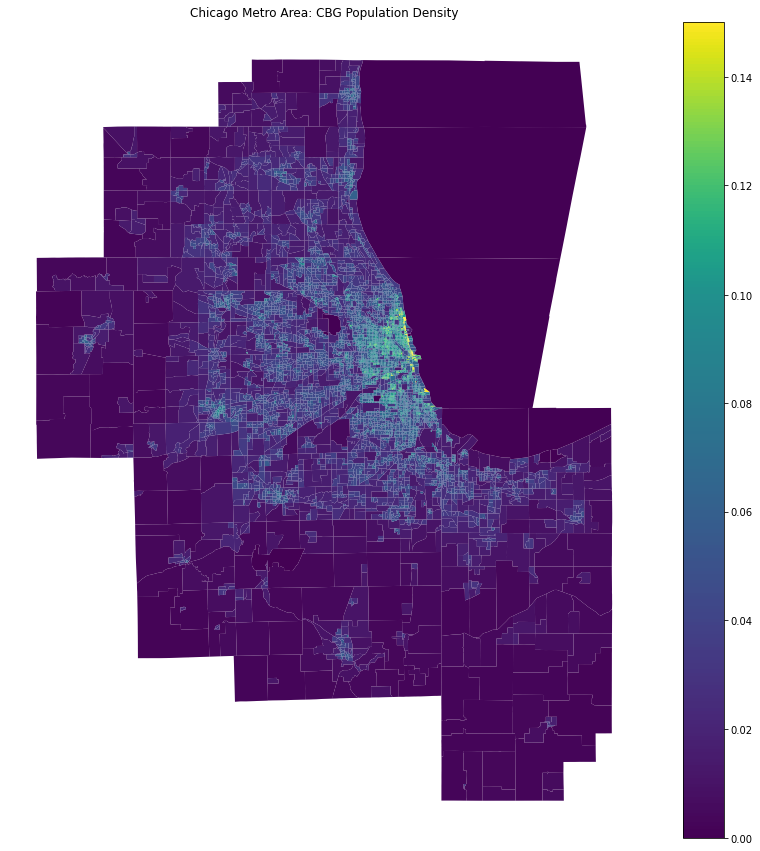

In [ ]:
import matplotlib
# Plot density

# fig, ax = plt.subplots()
midnorm = MidpointNormalize(vmin=0., vcenter=0.1, vmax=0.15)

fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Population Density')
ax.axis('off')
# gdf.plot(column='person_per_sq_meter', ax=ax, legend=True);
gdf.plot(column='person_per_sq_meter_sqrt', ax=ax, legend=True, norm=midnorm);

In [ ]:
!pip install geoplot



     |████████████████████████████████| 14.4MB 7.8MB/s 
     |████████████████████████████████| 225kB 42.8MB/s 
     |████████████████████████████████| 19.1MB 51.1MB/s 
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-linux_x86_64.whl size=15127668 sha256=6deec76e8bcf400b54bb2aac350d208fb9182312557cb43eaee168509ed12de3
  Stored in directory: /root/.cache/pip/wheels/8d/f8/da/2c05136f2162370d2baec85bfbbf91d7729ab9e248da878acd
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=3122ca364738d07d0c0edfbe4a4a9587e114b308be25867ec7d4558a1246ba39
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built cartopy pyshp


In [ ]:
import geoplot as gplt

import geoplot.crs as gcrs

In [ ]:
!ls drive/MyDrive/big-data-project/sketch/justin/

ch.geojson


In [ ]:
path = Path('drive/MyDrive/big-data-project/analysis/meta/')
path.mkdir(parents=True, exist_ok=True)
gdf.to_file(path/"{}.geojson".format(city_dir), driver='GeoJSON')

In [ ]:
pip install keplergl

     |████████████████████████████████| 7.9MB 4.6MB/s 
  Created wheel for keplergl: filename=keplergl-0.2.2-py2.py3-none-any.whl size=15942747 sha256=0ab2e120b7a9cb0ec72bdf30169c957f5c28c0fbd9ed80907508b70d193ac9bc
  Stored in directory: /root/.cache/pip/wheels/0e/78/c4/04ea0dbf6447ad708393751cd6ea453fb682f4c1c734f2247b
Successfully built keplergl


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()